In [4]:
import pandas as pd 
import pymysql

In [25]:
db_config = {
    "host" : "localhost",
    "user" : "root",
    "password" : "Fuckoff@69",
    "database" : "sales"
}

In [21]:
queries = {
    " Question 1: Durring a transactions that occured in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source Table: order_details" :
    """SELECT 
	DATE_FORMAT(order_date, '%m') AS Month_ID,
    DATE_FORMAT(order_date, '%M') AS Month,
    DATE_FORMAT(order_date, '%Y') AS Year,
    SUM(after_discount) AS total_transaction
FROM order_details
WHERE YEAR(order_date)=2021 AND is_valid=1
GROUP BY Month_ID, Month, Year
ORDER BY total_transaction DESC;
""",
    "Question 2: Durring trancastion in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source Table: order_details, sku_details" :
    """SELECT 
	DATE_FORMAT(ordet.order_date, '%Y') AS Year,
    skudet.category,
    SUM(ordet.after_discount) AS total_transaction
FROM order_details AS ordet
JOIN sku_details AS skudet
ON ordet.sku_id = skudet.id
WHERE YEAR(ordet.order_date) = 2022 AND ordet.is_valid = 1
GROUP BY 
	Year,
    skudet.category
ORDER BY total_transaction DESC;
""",
    "Question 3: Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced decrease in transaction value from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table: order_details, sku_details" :
    """WITH
final_table AS
(
SELECT
	skudet.category,
    SUM(CASE WHEN EXTRACT(YEAR FROM ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
    SUM(CASE WHEN EXTRACT(YEAR FROM ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
FROM order_details AS ordet
JOIN sku_details AS skudet
ON ordet.sku_id = skudet.id
WHERE is_valid = 1
GROUP BY 1
ORDER BY 1
)
SELECT *, (transaction_2022 - transaction_2021) AS delta,
CASE WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' ELSE 'DECREASE' END AS remark
FROM final_table;
""",
    "Question 4: Display the top 5 most popular payment method used during 2022(based on total unique orders). Use is_valid = 1 to fiilter transaction data. Source table: order_details, payment_details" : 
    """SELECT
	paydet.payment_method,
    DATE_FORMAT(ordet.order_date, '%Y') AS Year,
    COUNT(DISTINCT ordet.id) AS freq
FROM order_details as ordet
JOIN payment_details as paydet
ON ordet.payment_id = paydet.id
WHERE ordet.is_valid = 1 AND YEAR(ordet.order_date) = 2022
GROUP BY 
	paydet.payment_method,
    Year
ORDER BY freq DESC
LIMIT 5;
""",
    "QUESTION 5: Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data." :
    """
    WITH
final_table AS (
SELECT 
	CASE
    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
    WHEN LOWER(skudet.sku_name) LIKE '%apple%' OR 
		LOWER(skudet.sku_name) LIKE '%iphone%' OR
        LOWER(skudet.sku_name) LIKE '%macbook%' OR
        LOWER(skudet.sku_name) LIKE '%ipad%' THEN 'Apple'
	WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
    END AS product_brand,
    SUM(ordet.after_discount) AS total_transaction
    FROM order_details AS ordet
    JOIN sku_details AS skudet
    ON ordet.sku_id = skudet.id
    WHERE ordet.is_valid = 1
    GROUP BY product_brand
    )
    SELECt * FROM final_table
    WHERE product_brand IS NOT NULL
    ORDER BY total_transaction DESC;
    """
}

In [8]:
from IPython.display import display

In [10]:
# Connect to database 
try: 
    connection = pymysql.connect(**db_config)
    print("Database connection successful!!!")

    # Execute each query and display result 
    for question, query in queries.items():
        print(f"\n{question}")
        df = pd.read_sql(query, connection)
        display(df) # Display the DataFrame in notebook

except Exception as e:
    print(f"An error occured {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!!!

 Question 1: Durring a transactions that occured in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source Table: order_details


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/2398893505.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



Question 2: Durring trancastion in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source Table: order_details, sku_details


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/2398893505.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Year,category,total_transaction
0,2022,Mobiles & Tablets,9.128256e+08
1,2022,Entertainment,3.611392e+08
2,2022,Appliances,3.095840e+08
3,2022,Computing,2.124082e+08
4,2022,Men Fashion,1.333326e+08
5,2022,Women Fashion,9.023613e+07
6,2022,Home & Living,7.865896e+07
7,2022,Health & Sports,5.200838e+07
8,2022,Beauty & Grooming,4.559842e+07
9,2022,Superstore,3.264327e+07



Question 3: Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced decrease in transaction value from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table: order_details, sku_details


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/2398893505.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
1,Beauty & Grooming,4.450769e+07,4.559842e+07,1.090731e+06,INCREASE
2,Books,1.012460e+07,6.792519e+06,-3.332077e+06,DECREASE
3,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
4,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
5,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE
6,Home & Living,4.438511e+07,7.865896e+07,3.427385e+07,INCREASE
7,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
8,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
9,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE



Question 4: Display the top 5 most popular payment method used during 2022(based on total unique orders). Use is_valid = 1 to fiilter transaction data. Source table: order_details, payment_details


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/2398893505.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,Year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



QUESTION 5: Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data.


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/2398893505.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.452825e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [11]:
import os

In [22]:
# Folder path to save the CSV file 
output_folder = r"/Users/devthakur/Documents/Dev/Data Analyst/sales"
os.makedirs(output_folder, exist_ok = True)

In [23]:
tables = ["order_details","sku_details","payment_details","customer_details"]

In [26]:
try:
    connection = pymysql.connect(**db_config)
    print("Database connection scuccessful!!!")

    for table in tables:
        print(f"Exporting table: {table}")

        # SQL query to fetch all the data from table
        query = f"SELECT * FROM {table};"

        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)

        # Save the DataFrame to CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)

        print(f"Table {table} exported succesfully to {output_file}.")

except Exception as e:
    print(f"An error occured: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed")

Database connection scuccessful!!!
Exporting table: order_details
Table order_details exported succesfully to /Users/devthakur/Documents/Dev/Data Analyst/sales/order_details.csv.
Exporting table: sku_details
Table sku_details exported succesfully to /Users/devthakur/Documents/Dev/Data Analyst/sales/sku_details.csv.
Exporting table: payment_details


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/1021630005.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table payment_details exported succesfully to /Users/devthakur/Documents/Dev/Data Analyst/sales/payment_details.csv.
Exporting table: customer_details
Table customer_details exported succesfully to /Users/devthakur/Documents/Dev/Data Analyst/sales/customer_details.csv.
Database connection closed


In [27]:
df_sd = pd.read_csv("sku_details.csv")
df_od = pd.read_csv("order_details.csv")
df_pd = pd.read_csv("payment_details.csv")
df_cd = pd.read_csv("customer_details.csv")

In [28]:
df_sd.rename(columns={'id':'sku_id'},inplace = True)
df_pd.rename(columns={'id':'payment_id'},inplace = True)
df_cd.rename(columns={'id':'customer_id'},inplace = True)

In [29]:
df = pd.DataFrame(df_od\
                  .merge(df_sd, how='left', on='sku_id')\
                  .merge(df_cd, how='left', on='customer_id')\
                  .merge(df_pd, how='left', on='payment_id')
                 )

In [30]:
df.head()


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,sku_name,base_prise,cogs,category,registered_date,payment_method
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,0,0,5,emart_Magic Hose Pipe 75 Ft,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,1,1,1,sheraton_FMOTORS_01,159500.0,97266.0,Health & Sports,2022-08-15,cod
2,ODR1119282607l,C192625L,2021-08-07,P146984,919300,1,919300.0,0.0,919300.0,1,0,0,8,tcl_ 24 inch D2720 HD Ready LED TV,919300.0,671060.0,Entertainment,2021-07-27,ublcreditcard
3,ODR1119964698b,C225180L,2021-08-11,P523149,59856,1,59856.0,0.0,59856.0,1,1,1,1,phub_Hope by Rasasi 75ml EDP,59856.0,53824.0,Beauty & Grooming,2021-10-11,cod
4,ODR1120310291y,C708473L,2021-09-18,P692619,34510,1,34510.0,0.0,34510.0,1,1,1,1,Progressive_9781474813860,34510.0,29290.0,Books,2021-07-02,cod


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_prise       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [32]:
for x in ['order_date','registered_date']:
    df[x] = pd.to_datetime(df[x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5764 non-null   object        
 1   customer_id      5764 non-null   object        
 2   order_date       5764 non-null   datetime64[ns]
 3   sku_id           5764 non-null   object        
 4   price            5764 non-null   int64         
 5   qty_ordered      5764 non-null   int64         
 6   before_discount  5764 non-null   float64       
 7   discount_amount  5764 non-null   float64       
 8   after_discount   5764 non-null   float64       
 9   is_gross         5764 non-null   int64         
 10  is_valid         5764 non-null   int64         
 11  is_net           5764 non-null   int64         
 12  payment_id       5764 non-null   int64         
 13  sku_name         5764 non-null   object        
 14  base_prise       5764 non-null   float64

In [33]:
df.head()


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,sku_name,base_prise,cogs,category,registered_date,payment_method
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,0,0,5,emart_Magic Hose Pipe 75 Ft,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,1,1,1,sheraton_FMOTORS_01,159500.0,97266.0,Health & Sports,2022-08-15,cod
2,ODR1119282607l,C192625L,2021-08-07,P146984,919300,1,919300.0,0.0,919300.0,1,0,0,8,tcl_ 24 inch D2720 HD Ready LED TV,919300.0,671060.0,Entertainment,2021-07-27,ublcreditcard
3,ODR1119964698b,C225180L,2021-08-11,P523149,59856,1,59856.0,0.0,59856.0,1,1,1,1,phub_Hope by Rasasi 75ml EDP,59856.0,53824.0,Beauty & Grooming,2021-10-11,cod
4,ODR1120310291y,C708473L,2021-09-18,P692619,34510,1,34510.0,0.0,34510.0,1,1,1,1,Progressive_9781474813860,34510.0,29290.0,Books,2021-07-02,cod


# Question 1

Dear Data Analyst,

As part of your year end festival competition, the cokmpany plans to award  prizes to our top customers. To fecilitate this, the marketing team an 
analysis to estimate the prizes for the winners. Specifically, we need data on the TOP 5 products in the Mobiles and Tablets categore for the year 
2022, ranked by the highest sales quantities (where valid = 1).
We would appreciate if you could compile and share this information with us before the end of this month to ensure we meet our planning deadlines.

Thank you for your continued support and collaboration.

Best Regards,
Marketing Teameting Team


In [52]:
top_5_prod = pd.DataFrame(\
    df[(df['category']=='Mobiles & Tablets')&(df['is_valid']==1)&(df['order_date'].dt.year==2022)]\
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
    .reset_index(name='qty_ordered')\
    .sort_values(by='qty_ordered',ascending=False)\
    .head(5).reset_index(drop=True)
)
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

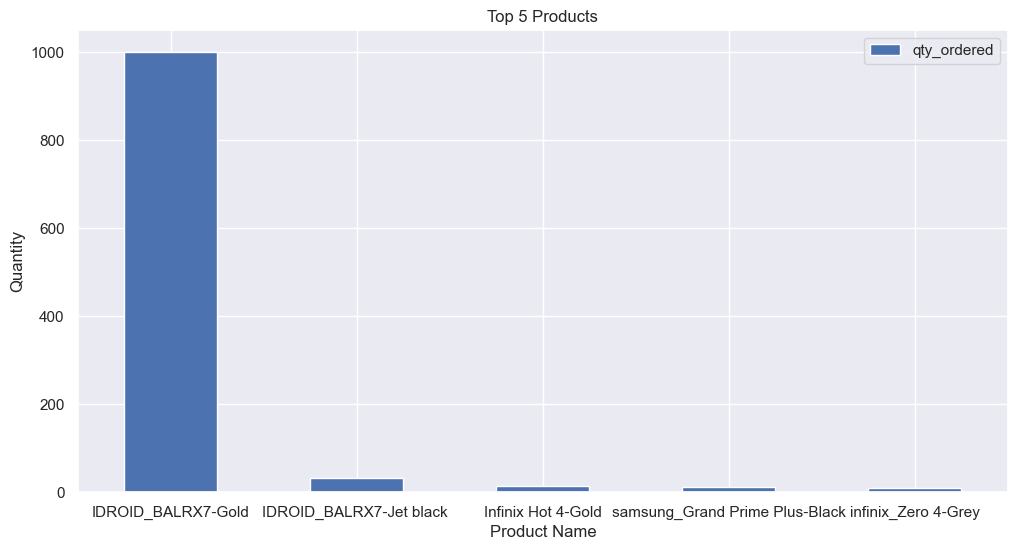

In [53]:
sns.set()
top_5_prod.plot(y=['qty_ordered'],
                x='sku_name',
                kind='bar',
                grid=True,
                xlabel='Product Name',
                ylabel='Quantity',
                title='Top 5 Products',
                rot=False,
                figsize=(12,6)
               )
plt.show()

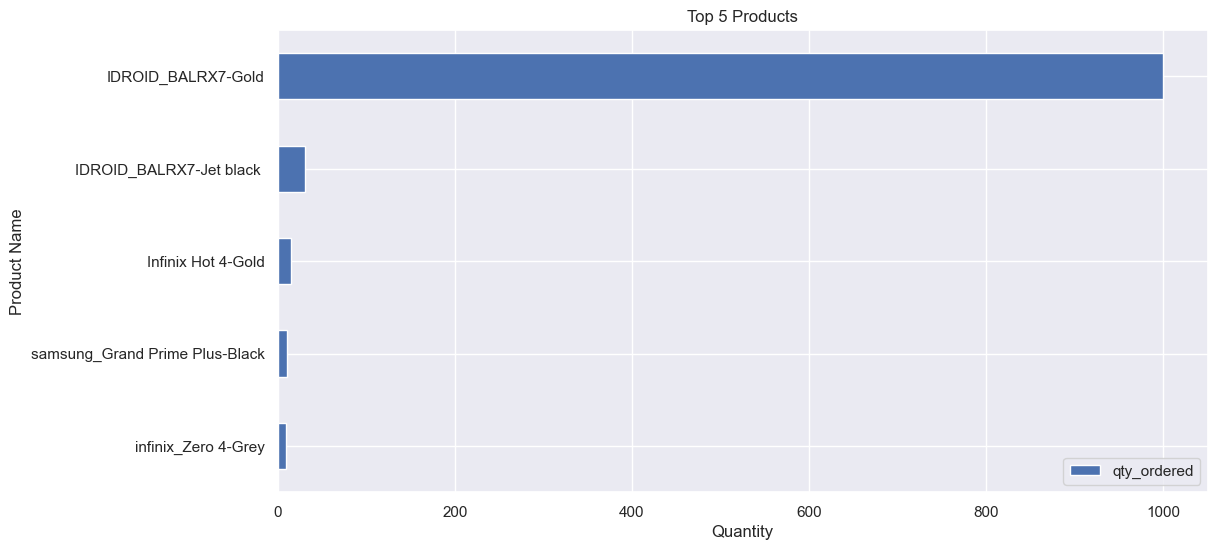

In [55]:
top_5_prod.sort_values(by='qty_ordered',ascending=True,inplace=True)
top_5_prod.plot(x='sku_name',
                y=['qty_ordered'],
                kind='barh',
                grid=True,
                ylabel='Product Name',
                xlabel='Quantity',
                title='Top 5 Products',
                rot=False,
                figsize=(12,6)
               )
plt.show()

# Question 2
Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in 'Other' category as the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021. (Please also include data for the 15th category)

If a decrease in sales quantity for the 'Other' category is confirmed, we would appreciate it if you could provide details of the top 20 products that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

Please share the requested data within 4 days. We sincerely appreciate your assistance and cooperation.

Best regards, Warehouse Team

In [56]:
cat_data_2021=pd.DataFrame(\
    df[(df['is_valid']==1)&(df['order_date'].dt.year==2021)]\
    .groupby(by=['category'])['qty_ordered'].sum()\
    .reset_index(name='qty_ordered_2021')
)

cat_data_2022=pd.DataFrame(\
    df[(df['is_valid']==1)&(df['order_date'].dt.year==2022)]\
    .groupby(by=['category'])['qty_ordered'].sum()\
    .reset_index(name='qty_ordered_2022')
)

cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

cat_data_2021_2022    

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,164,152
2,Books,171,195
3,Computing,109,151
4,Entertainment,73,149
5,Health & Sports,168,197
6,Home & Living,189,249
7,Kids & Baby,166,224
8,Men Fashion,235,173
9,Mobiles & Tablets,107,1153


In [60]:
cat_data_2021_2022['qty_growth']=cat_data_2021_2022['qty_ordered_2022']-cat_data_2021_2022['qty_ordered_2021']

cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth']/x['qty_ordered_2021']*100),2))

def updown_check(delta):
    if delta < 0:
        return 'DOWN'
    elif delta == 0:
        return 'FAIR'
    else:
        return 'UP'

cat_data_2021_2022['remark']=cat_data_2021_2022['qty_growth'].apply(updown_check)

cat_data_2021_2022.sort_values(by='qty_growth',ascending=True,inplace=True)
cat_data_2021_2022.reset_index(drop=True,inplace=True)

cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,422,254,-168,-39.81,DOWN
1,Soghaat,753,607,-146,-19.39,DOWN
2,Men Fashion,235,173,-62,-26.38,DOWN
3,Beauty & Grooming,164,152,-12,-7.32,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,168,197,29,17.26,UP
7,Computing,109,151,42,38.53,UP
8,School & Education,182,235,53,29.12,UP
9,Kids & Baby,166,224,58,34.94,UP


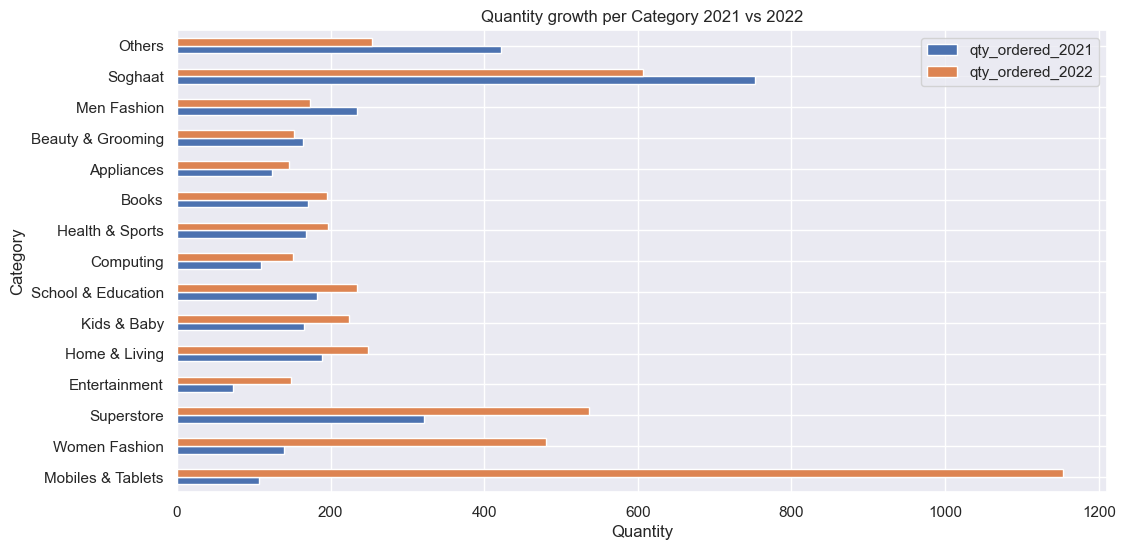

In [61]:
cat_data_2021_2022.sort_values(by='qty_growth',ascending=False, inplace=True) 

sns.set()
cat_data_2021_2022.plot(x='category',
                        y=['qty_ordered_2021','qty_ordered_2022'],
                        kind='barh',
                        xlabel='Quantity',
                        ylabel='Category',
                        title='Quantity growth per Category 2021 vs 2022',
                        figsize=(12,6)
                       )
plt.show()

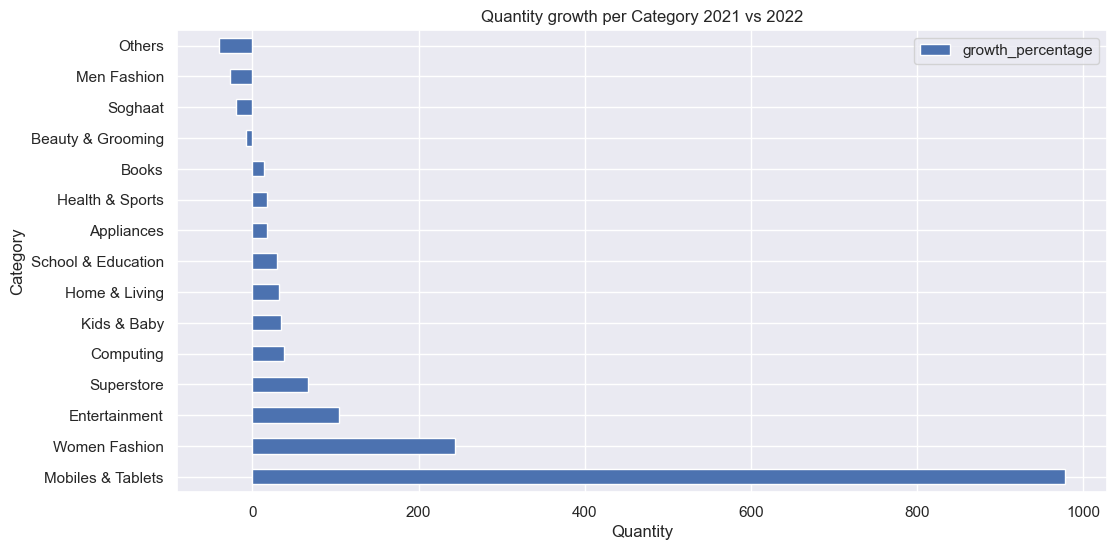

In [62]:
cat_data_2021_2022.sort_values(by='growth_percentage',ascending=False,inplace=True)

sns.set()
cat_data_2021_2022.plot(x='category',
                        y=['growth_percentage'],
                        kind='barh',
                        xlabel='Quantity',
                        ylabel='Category',
                        title='Quantity growth per Category 2021 vs 2022',
                        figsize=(12,6)
                       )
plt.show()

In [80]:
others_2021=pd.DataFrame(
    df[(df['category']=='Others')&(df['is_valid']==1)&(df['order_date'].dt.year==2021)]
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()
    .reset_index(name='qty_ordered_2021')
)

others_2022=pd.DataFrame(
    df[(df['category']=='Others')&(df['is_valid']==1)&(df['order_date'].dt.year==2022)]
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()
    .reset_index(name='qty_ordered_2022')
)

others_2021_2022=others_2021.merge(others_2022[['sku_name','qty_ordered_2022']],how='outer',on='sku_name')

others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,NaN,NaN,1.0
4,Am-PTV_ATS-004-M,Others,5.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0
159,test-product-00,NaN,NaN,1.0
160,tucano_IPD7AN-BK,Others,1.0,NaN


In [83]:
others_2021_2022.isna().sum()

sku_name             0
category            77
qty_ordered_2021    77
qty_ordered_2022    66
dtype: int64

In [84]:
others_2021_2022['category']=others_2021_2022['category'].fillna('Others')

In [85]:
others_2021_2022.isna().sum()

sku_name             0
category             0
qty_ordered_2021    77
qty_ordered_2022    66
dtype: int64

In [86]:
others_2021_2022.fillna(0,inplace=True)

In [87]:
others_2021_2022.isna().sum()

sku_name            0
category            0
qty_ordered_2021    0
qty_ordered_2022    0
dtype: int64

In [88]:
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,Others,0.0,1.0
4,Am-PTV_ATS-004-M,Others,5.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0
159,test-product-00,Others,0.0,1.0
160,tucano_IPD7AN-BK,Others,1.0,0.0


In [90]:
others_2021_2022['delta_2021_2022']=others_2021_2022['qty_ordered_2022']-others_2021_2022['qty_ordered_2021']

others_2021_2022['remark']=others_2021_2022['delta_2021_2022'].apply(updown_check)

others_2021_2022.sort_values(by='delta_2021_2022',ascending=True,inplace=True)

others_2021_2022.reset_index(drop=True,inplace=True)

others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2021_2022,remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,23.0,0.0,-23.0,DOWN
2,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,20.0,0.0,-20.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,13.0,0.0,-13.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,7.0,7.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,8.0,8.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,13.0,13.0,UP
160,SKMT_Medicine,Others,0.0,20.0,20.0,UP


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/680643806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022_Top_20.sort_values(by='delta_2021_2022',ascending=False,inplace=True)


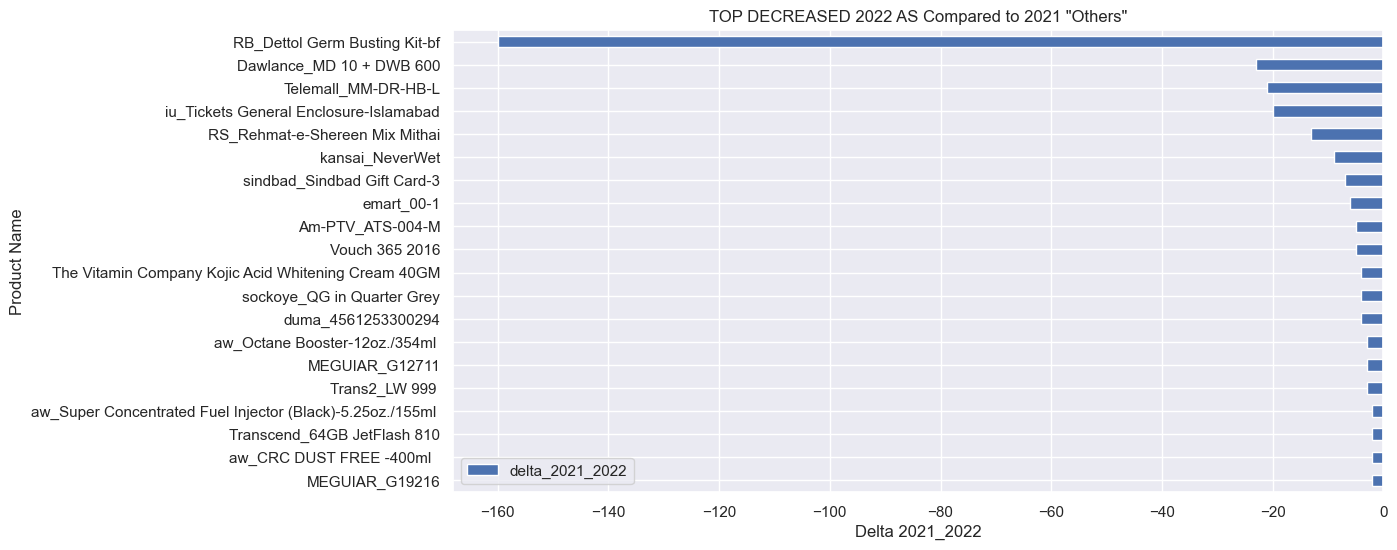

In [94]:
others_2021_2022_Top_20=others_2021_2022.head(20)
others_2021_2022_Top_20.sort_values(by='delta_2021_2022',ascending=False,inplace=True)

sns.set()
others_2021_2022_Top_20.plot(x='sku_name',
                             y='delta_2021_2022',
                             kind='barh',
                             grid=True,
                             figsize=(12,6),
                             xlabel='Delta 2021_2022',
                             ylabel='Product Name',
                             title='TOP DECREASED 2022 AS Compared to 2021 "Others"'
                            )
plt.show()

# Question 3
Dear Data Analyst,

As we prepare for the company's upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not yet made a payment(is_gross = 1) during the year 2022.
Specifically, we need the Customer IDs and their Registered Dates.

We kindly request your assistance in compiling and delivering this data to Digital Marketing Team before the month's end. Your support in this matter is greatly appreciated.

Best regards, Digital Marketing Team

In [105]:
cs_gross_data=df.loc[:,['customer_id','registered_date']][(df['is_gross']==1)&(df['is_valid']==0)&(df['is_net']==0)&(df['order_date'].dt.year==2022)]
cs_gross_data

,customer_id,registered_date
0,C993531L,2021-11-08
8,C652751L,2022-07-19
19,C189144L,2022-07-01
22,C224183L,2022-04-07
23,C907186L,2022-05-08
...,...,...
5729,C217246L,2022-08-04
5734,C577176L,2022-06-01
5742,C744990L,2022-05-21
5756,C317976L,2021-11-26


In [107]:
def check_customerid(x):
    unique_customerid = len(x['customer_id'].unique().tolist())
    row_count = len(x.index)
    return [unique_customerid, row_count]

test=check_customerid(cs_gross_data)
print('Before Data: ',test)

if test[0] == test[1]:
    print('There is no duplicated data.')
else:
    print('There are duplicated data:',test[1]-test[0])
    cs_gross_data.drop_duplicates(inplace=True)
    print('After Data: ',check_customerid(cs_gross_data))

cs_gross_data.reset_index(drop=True,inplace=True)
cs_gross_data

Before Data:  [820, 1023]
There are duplicated data: 203
After Data:  [820, 820]


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


# Question 4
Dear Data Analyst,

Between October and December 2022, we ran promotional campaingns every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales (before discount) for weekends (Saturday and Sunday) compared to weekdays (Monday to Friday) for each month during this period. Please specify whether sales increased during for each month.

The average daily sales (before discount) for weekends vs weekdays across entire three months period.

We kindly request the data to be shared with us by the end of next week. Thank you for your continued support.

Best regards, Campaingn Team

In [108]:
df['month_id']=df['order_date'].dt.month
df['month_name']=df['order_date'].dt.month_name()
df['day_name']=df['order_date'].dt.day_name()
df['year']=df['order_date'].dt.year

In [119]:
data_weekends=pd.DataFrame(
    df[(df['is_valid']==1)&(df['month_id']>=10)&(df['day_name'].isin(['Saturday','Sunday']))&(df['year']==2022)]
    .groupby(by=['month_id','month_name','year'])['before_discount'].mean().round(2)
    .reset_index(name='avg_sales_weekends')
    .sort_values(by='month_id',ascending=True)
)

data_weekdays=pd.DataFrame(
    df[(df['is_valid']==1)&(df['month_id']>=10)&(df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))&(df['year']==2022)]
    .groupby(by=['month_id','month_name','year'])['before_discount'].mean().round(2)
    .reset_index(name='avg_sales_weekdays')
    .sort_values(by='month_id',ascending=True)
)

data_weekdays_weekends=data_weekdays.merge(data_weekends)

data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


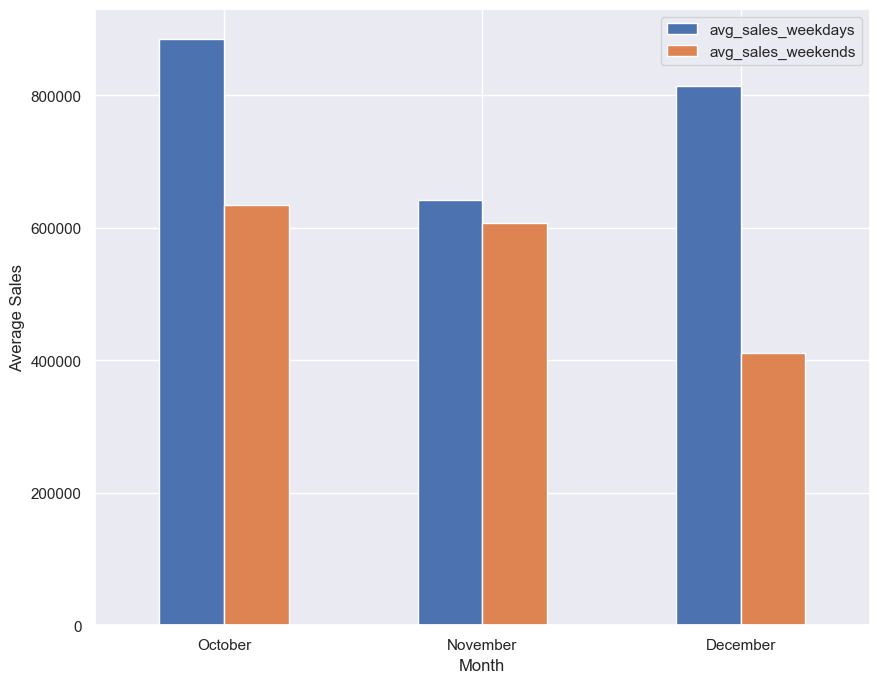

In [125]:
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid=True,
                            xlabel='Month',
                            ylabel='Average Sales',
                            figsize=(10,8),
                            rot=0
                           )
plt.show()

In [126]:
data_weekends_all=df[(df['is_valid']==1)&(df['day_name'].isin(['Saturday','Sunday']))&(df['month_id']>=10)&(df['year']==2022)]

data_weekdays_all=df[(df['is_valid']==1)&(df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))&(df['month_id']>=10)&(df['year']==2022)]

all_month_avg_compare={
    'Period':'Total 3 Months',
    'Avg Weekdays Sales':round(data_weekdays_all['before_discount'].mean(),2),
    'Avg Weekends Sales':round(data_weekends_all['before_discount'].mean(),2),
    'Diff (Value)':round(data_weekends_all['before_discount'].mean()-data_weekdays_all['before_discount'].mean(),2),
    'Diff (%)':pd.Series(round(((data_weekends_all['before_discount'].mean()-data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2),dtype=str)+'%'
}

compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare,index=[0])

compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 Months,772341.0,558865.06,-213475.94,-38.2%


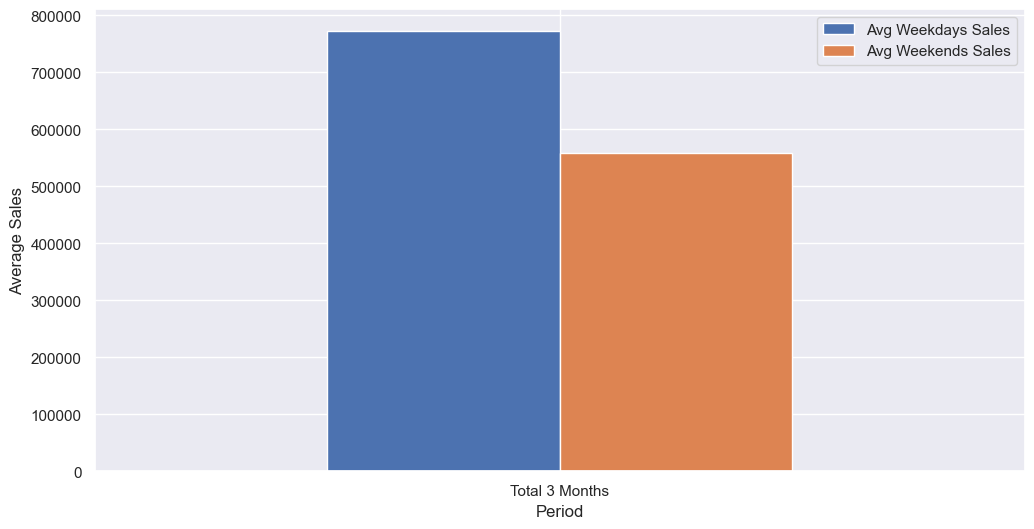

In [128]:
sns.set()

compare_avg_weekends_weekdays.plot(x='Period',
                                   y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                   grid=True,
                                   kind='bar',
                                   ylabel='Average Sales',
                                   figsize=(12,6),
                                   rot=0
                                  )
plt.show()

In [129]:
file_path=r'/Users/devthakur/Documents/Dev/Data Analyst/sales/final_dataset.csv'

df.to_csv(file_path,index=False)

print(f'File successfully saved to {file_path}')

File successfully saved to /Users/devthakur/Documents/Dev/Data Analyst/sales/final_dataset.csv


In [130]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_prise,cogs,category,registered_date,payment_method,month_id,month_name,day_name,year
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,...,emart_Magic Hose Pipe 75 Ft,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet,2,February,Wednesday,2022
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,...,sheraton_FMOTORS_01,159500.0,97266.0,Health & Sports,2022-08-15,cod,10,October,Saturday,2022
2,ODR1119282607l,C192625L,2021-08-07,P146984,919300,1,919300.0,0.0,919300.0,1,...,tcl_ 24 inch D2720 HD Ready LED TV,919300.0,671060.0,Entertainment,2021-07-27,ublcreditcard,8,August,Saturday,2021
3,ODR1119964698b,C225180L,2021-08-11,P523149,59856,1,59856.0,0.0,59856.0,1,...,phub_Hope by Rasasi 75ml EDP,59856.0,53824.0,Beauty & Grooming,2021-10-11,cod,8,August,Wednesday,2021
4,ODR1120310291y,C708473L,2021-09-18,P692619,34510,1,34510.0,0.0,34510.0,1,...,Progressive_9781474813860,34510.0,29290.0,Books,2021-07-02,cod,9,September,Saturday,2021


# Tasks
##  Question 1: 
Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities)


In [142]:
mobiles_tablets_2022 = pd.DataFrame(
    df[(df['category']=='Mobiles & Tablets')&(df['is_valid']==1)&(df['order_date'].dt.year==2022)]
    .groupby(by=['sku_name','category'])['qty_ordered'].sum()
    .reset_index(name='qty_ordered_2022')
    .sort_values(by='qty_ordered_2022',ascending=False)
)
mobiles_tablets_2022.reset_index(drop=True,inplace=True)
mobiles_tablets_2022

,sku_name,category,qty_ordered_2022
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10
5,samsung_Grand Prime Plus-Silver,Mobiles & Tablets,10
6,iphone_7-128GB-wof-Matt Black,Mobiles & Tablets,6
7,Samsung-Galaxy-S8-G955-Plus-Black,Mobiles & Tablets,5
8,iphone_7-128GB-wof-Jet Black,Mobiles & Tablets,5
9,samsungGALAXY J510F-2016 DS LTE-Gold,Mobiles & Tablets,4


/var/folders/2k/01djsbmd1h9d1r6lfjsclmkh0000gn/T/ipykernel_70042/3054465787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobiles_tablets_2022_top5.sort_values(by='qty_ordered_2022',ascending=True,inplace=True)


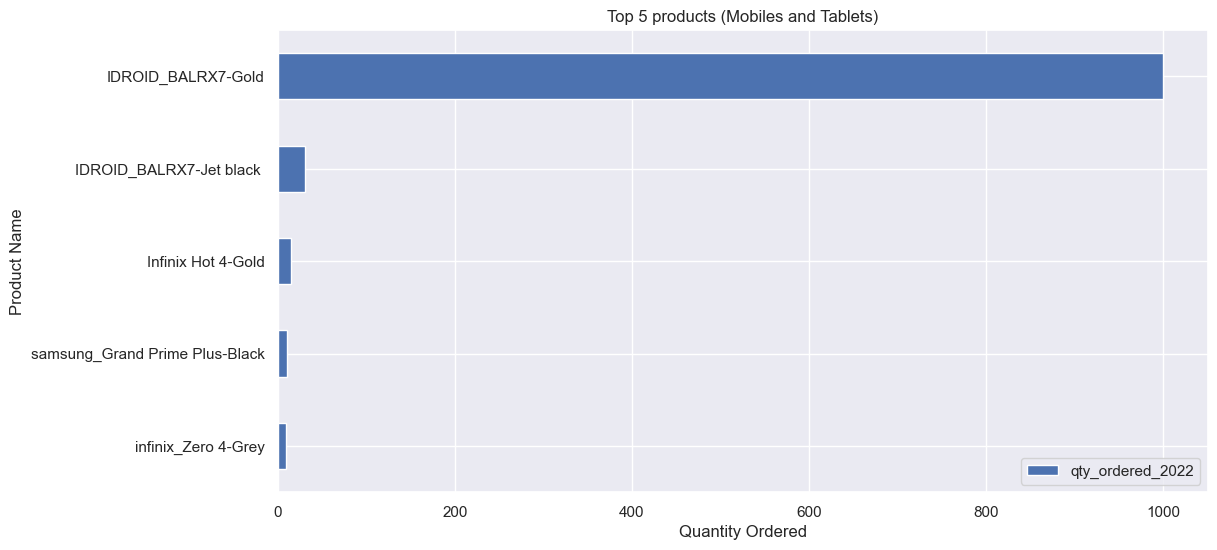

In [149]:
mobiles_tablets_2022_top5 = mobiles_tablets_2022.head(5)
mobiles_tablets_2022_top5.sort_values(by='qty_ordered_2022',ascending=True,inplace=True)
sns.set()
mobiles_tablets_2022_top5.plot(y='qty_ordered_2022',
                               x='sku_name',
                               kind='barh',
                               grid=True,
                               title='Top 5 products (Mobiles and Tablets)',
                               ylabel='Product Name',
                               xlabel='Quantity Ordered',
                               rot=0,
                               figsize=(12,6)
                              )
plt.show()

## Question 2 
Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data. Requirements:..1. Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023. 2. Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE). 3. Provide predictions for the upcoming quarter and identify any trends. Key Features to Use: • order_date • qty_ordered • Machine learning model libraries (e.g., Scikit-learn, Statsmodels)

In [154]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [163]:
df_2022=pd.DataFrame(
    df[df['order_date'].dt.year==2022]
)
df_2022.reset_index(drop=True,inplace=True)
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               3202 non-null   object        
 1   customer_id      3202 non-null   object        
 2   order_date       3202 non-null   datetime64[ns]
 3   sku_id           3202 non-null   object        
 4   price            3202 non-null   int64         
 5   qty_ordered      3202 non-null   int64         
 6   before_discount  3202 non-null   float64       
 7   discount_amount  3202 non-null   float64       
 8   after_discount   3202 non-null   float64       
 9   is_gross         3202 non-null   int64         
 10  is_valid         3202 non-null   int64         
 11  is_net           3202 non-null   int64         
 12  payment_id       3202 non-null   int64         
 13  sku_name         3202 non-null   object        
 14  base_prise       3202 non-null   float64

In [164]:
df_2022['quarter']=df_2022['order_date'].dt.to_period("Q")

In [165]:
df_2022.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,base_prise,cogs,category,registered_date,payment_method,month_id,month_name,day_name,year,quarter
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002,1,62002.0,0.0,62002.0,1,...,61654.0,51156.0,Home & Living,2021-11-08,jazzwallet,2,February,Wednesday,2022,2022Q1
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,159500.0,0.0,159500.0,1,...,159500.0,97266.0,Health & Sports,2022-08-15,cod,10,October,Saturday,2022,2022Q4
2,ODR1126180881t,C875194L,2022-01-14,P507387,57420,2,114840.0,0.0,114840.0,1,...,57420.0,51098.0,Health & Sports,2021-07-21,cod,1,January,Friday,2022,2022Q1
3,ODR1129414841e,C652751L,2022-07-26,P392301,4756000,1,4756000.0,0.0,4756000.0,1,...,4756000.0,3757240.0,Health & Sports,2022-07-19,cod,7,July,Tuesday,2022,2022Q3
4,ODR1131384330p,C597119L,2022-04-16,P920137,28942,3,86826.0,0.0,86826.0,1,...,14500.0,11716.0,Home & Living,2022-01-02,cod,4,April,Saturday,2022,2022Q2


In [167]:
sales_qty=df_2022.groupby(by='quarter')['qty_ordered'].sum()
sales_qty

quarter
2022Q1    2213
2022Q2    2521
2022Q3    2970
2022Q4     497
Freq: Q-DEC, Name: qty_ordered, dtype: int64

In [169]:
sales_series=sales_qty.copy()
sales_series.index=sales_series.index.to_timestamp()
sales_series

quarter
2022-01-01    2213
2022-04-01    2521
2022-07-01    2970
2022-10-01     497
Freq: QS-OCT, Name: qty_ordered, dtype: int64

In [170]:
model = ARIMA(sales_series,order=(1,1,1))
model_fit = model.fit()

/opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [171]:
predict_sample = model_fit.predict(
    start=sales_series.index[0], 
    end=sales_series.index[-1], 
    typ='level'
)
residual=sales_series-predict_sample

mae = np.mean(np.abs(residual))
rmse = np.sqrt(np.mean(residual**2))
print("\nIn-sample Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


In-sample Evaluation Metrics:
Mean Absolute Error (MAE): 1464.9606076958084
Root Mean Squared Error (RMSE): 1581.2093160739807


In [178]:
forecast=model_fit.forecast(steps=2)
Q2_2023_forecast=forecast.iloc[-1]
print(f"\nTotal quantity ordered forecast for Q2 2023: {Q2_2023_forecast}")


Total quantity ordered forecast for Q2 2023: 1512.4788153219874


## Question 3. 
Net Profit per Customer Segment (Low, Medium, High) Scenario: The Marketing Team wants to categorize customers into segments based on their total net profit contribution and analyze how these segments are performing. Requirements: 1. Create a calculated field to calculate the total net profit per customer using the formula: SUM(after_discount - cogs). 2. Use a case statement or formula to categorize customers as "Low", "Medium", or "High" based on the total net profit: o Low: Less than $100 o Medium: Between $100 and $500 o High: Greater than $500 3. Create a pie chart to show the distribution of customers across these segments. Key Features to Use: • customer_id • after_discount • cogs


In [183]:
df['net_profit']=df['after_discount']-df['cogs']
profit_customer=df.groupby(by='customer_id')['net_profit'].sum().reset_index()

In [187]:
def categorize_customer(profit):
    if profit < 100:
        return 'Low'
    elif 100 <= profit <= 500:
        return 'Medium'
    else: 
        return 'High'

profit_customer['segment']=profit_customer['net_profit'].apply(categorize_customer)

In [191]:
segment_count = profit_customer['segment'].value_counts()
segment_count

segment
High      3877
Low        116
Medium       5
Name: count, dtype: int64

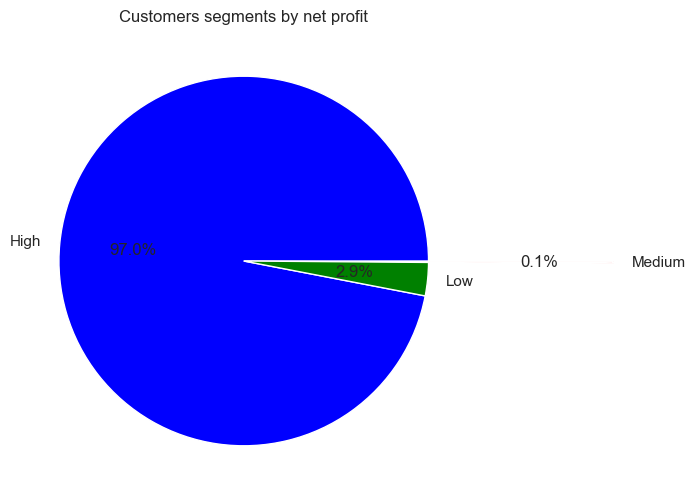

In [200]:
plt.figure(figsize=(12,6))
plt.pie(segment_count, labels=segment_count.index, autopct='%1.1f%%', colors=['blue','green','red'], explode =[0,0,1])
plt.title('Customers segments by net profit')
plt.show()